In [1]:
import generator as gen
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
training_gen = gen.generator(use='train', batch_size=16, mp=0.5, aug_mismatches=False, image_verbose=True, verbose=True)

In [ ]:
validation_gen = gen.generator(use='validate', batch_size=16, image_verbose=True, verbose=True)

In [ ]:
test_gen = gen.generator(use='test', batch_size=16, image_verbose=True, verbose=True)

In [ ]:
path = 'gen_validate'

In [ ]:
samples, tags = next(training_gen)

In [ ]:
samples, tags = next(validation_gen)

In [ ]:
samples, tags = next(test_gen)

In [ ]:
example_images = ['example1',
                  'example2',
                  'example3',
                  'example4',
                  'example5',
                  'example6',
                  'example7',
                  'example8',
                  'example9',
                  'example10']

aug_names = ['gaussian_blur',
        #'median_blur',
        #'gaussian_noise',
        #'salt_pepper_noise',
        #'poisson_noise',
        'speckle_noise',
        'rand_rotation',
        'rand_crop',
        'rand_obstruction',
        'rand_hue',
        #'rand_saturation',
        'rand_brightness'
       ]

def augment(img, type, v):
    if type == 'gaussian_blur': return gen.gaussian_blur(img, verbose=v, test=True)
    elif type == 'median_blur': return gen.median_blur(img, verbose=v, test=True)
    elif type == 'gaussian_noise': return gen.gaussian_noise(img, verbose=v, test=True)
    elif type == 'salt_pepper_noise': return gen.salt_pepper_noise(img, verbose=v, test=True)
    elif type == 'poisson_noise': return gen.poisson_noise(img, verbose=v, test=True)
    elif type == 'speckle_noise': return gen.speckle_noise(img, verbose=v, test=True)
    elif type == 'rand_rotation': return gen.rand_rotation(img, verbose=v, test=True)
    elif type == 'rand_crop': return gen.rand_crop(img, verbose=v, test=True)
    elif type == 'rand_obstruction': return gen.rand_obstruction(img, verbose=v, test=True)
    elif type == 'rand_hue': return gen.rand_hue(img, verbose=v, test=True)
    elif type == 'rand_saturation': return gen.rand_saturation(img, verbose=v, test=True)
    elif type == 'rand_brightness': return gen.rand_brightness(img, verbose=v, test=True)
    else: print("Unknown type of augmentation")

all_images = []
directories = []
instances = []
for col in example_images:
    images = []
    weights = gen.get_weights('train', False)[0]
    instances, directory = gen.get_instances('train', weights)
    instance = gen.get_rand_instance(instances)
    directories.append(directory)
    instances.append(instance)
    img = gen.get_crop(instance, directory)
    imgr = cv2.resize(img, (200, 400))
    imgrc = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)
    images.append(imgrc)
    for aug in aug_names:
        images.append(augment([imgrc], aug, False)[0])
    all_images.append(images)
        
cols = example_images
rows = ['orignal'] + aug_names

fig, axes = plt.subplots(nrows=1+len(aug_names), ncols=len(example_images), figsize=(14, 20))
                         
for col, images in enumerate(all_images):
    for row, image in enumerate(images):
        axes[row,col].imshow(image)
        axes[row,col].set_xticks([])
        axes[row,col].set_yticks([])

pad = 5
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation = 90)


fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
plt.show()

In [ ]:
#fig.savefig('figures/6_3c.png', bbox_inches='tight')

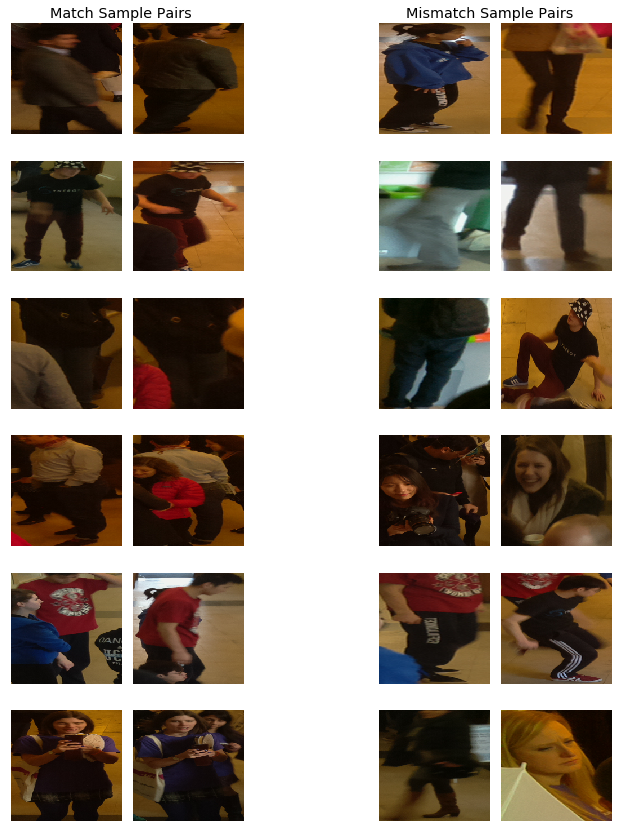

In [43]:
rows = 6
figure_gen = gen.generator(use='test', batch_size=16)
(samples1, samples2), tags = next(figure_gen)

samples_match = []
samples_mismatch = []
for tag, sample1, sample2 in zip(tags, samples1, samples2):
    if tag:
        samples_match.append([sample1, sample2])
    else:
        samples_mismatch.append([sample1, sample2])
        
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(10, rows*1.9))

def plot_image(img):
    img1_out = np.copy(img) * 255
    img1_out=img1_out.astype(np.uint8)
    return cv2.cvtColor(img1_out, cv2.COLOR_BGR2RGB)
    

for row, (all_match_type) in enumerate(zip(samples_match[:rows], samples_mismatch[:rows])):
    for col1, match_type in enumerate(all_match_type):
        for col2, img in enumerate(match_type):
            col = (col1 * (len(match_type) + 1)) + col2 
            axes[row,col].imshow(plot_image(img))
#             axes[row,col].set_xticks([])
#             axes[row,col].set_yticks([])
            
for ax in axes.reshape(-1):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
        

pad = 5
for ax, col in zip(axes[0], ['match','','','mismatch','']):
    text = ''
    if col == 'match': text = 'Match Sample Pairs'
    if col == 'mismatch': text = 'Mismatch Sample Pairs'
    ax.annotate(text, xy=(1, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='x-large', ha='center', va='baseline')
    
fig.tight_layout()
fig.subplots_adjust(left=0.15, top=1)
plt.show()

In [44]:
#fig.savefig('figures/7_0.png', bbox_inches='tight')

In [ ]:
samples, tags = next(gen)

In [ ]:
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
gaussian_blur = gen.gaussian_blur([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
median_blur = gen.median_blur([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
gaussian_noise = gen.gaussian_noise([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(gaussian_noise, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
salt_pepper_noise = gen.salt_pepper_noise([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(salt_pepper_noise, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
poisson_noise = gen.poisson_noise([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(poisson_noise, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
speckle_noise = gen.speckle_noise([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(speckle_noise, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
rand_rotation = gen.rand_rotation([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(rand_rotation, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
rand_crop = gen.rand_crop([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(rand_crop, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
rand_obstruction = gen.rand_obstruction([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(rand_obstruction, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
rand_hue = gen.rand_hue([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(rand_hue, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
rand_saturation = gen.rand_saturation([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(rand_saturation, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
rand_brightness = gen.rand_brightness([img], test=True, verbose=True)[0]
fig = plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(rand_brightness, cv2.COLOR_BGR2RGB))
plt.show()